In [1]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv("DP_study_result_new_nov_18.csv")
df.columns = ["control1", "control2", "test1", "test2", "test_follow_up", "q3", "q4", "initial_q"]
df

,control1,control2,test1,test2,test_follow_up,q3,q4,initial_q
0,2.5,3.0,NaN,NaN,NaN,I prefer knowing only the prediction accuracy ...,I prefer having both results,I know about differential privacy but I've nev...
1,NaN,NaN,1.0,1.0,Yes,I prefer knowing the prediction accuracy on bo...,I prefer having both results,I know about differential privacy but I've nev...
2,1.0,1.5,NaN,NaN,NaN,I prefer knowing the prediction accuracy on bo...,I prefer having only the result on the noisy data,I know about differential privacy and I've use...
3,3.5,3.5,NaN,NaN,NaN,I prefer knowing the prediction accuracy on bo...,I prefer having both results,I know about differential privacy but I've nev...
4,NaN,NaN,1.5,2.0,Yes,I prefer knowing only the prediction accuracy ...,I prefer having only the result on the noisy data,I know about differential privacy but I've nev...
5,NaN,NaN,1.5,2.0,Yes,I prefer knowing only the prediction accuracy ...,I prefer having only the result on the noisy data,I don't know anything about differential privacy
6,3.5,3.5,NaN,NaN,NaN,I prefer knowing the prediction accuracy on bo...,No preference,I don't know anything about differential privacy
7,3.5,3.5,NaN,NaN,NaN,I prefer knowing the prediction accuracy on bo...,I prefer having both results,I don't know anything about differential privacy
8,NaN,NaN,1.0,1.5,Yes,I prefer knowing the prediction accuracy on bo...,I prefer having only the result on the noisy data,I don't know anything about differential privacy
9,NaN,NaN,2.0,2.0,Yes,I prefer knowing the prediction accuracy on bo...,I prefer having both results,I know about differential privacy but I've nev...


In [32]:
print(len(df["control1"].dropna()), len(df["test1"].dropna()))

29 27


In [33]:
df["initial_q"].value_counts()

I don't know anything about differential privacy                                                                               27
I know about differential privacy but I've never used it in practice                                                           24
I know about differential privacy and I've used it in practice                                                                  4
I am an expert in differential privacy and I've done research / deployed real-world applications about differential privacy     1
Name: initial_q, dtype: int64

In [69]:
df["q3"].value_counts()

I prefer knowing the prediction accuracy on both noisy data and original data    42
I prefer knowing only the prediction accuracy on the noisy data                  12
No preference                                                                     2
Name: q3, dtype: int64

In [70]:
df["q4"].value_counts()

I prefer having both results                         38
I prefer having only the result on the noisy data    16
No preference                                         2
Name: q4, dtype: int64

In [51]:
import matplotlib.pyplot as plt

def plot_boxplot(control, test, name, labels=None, savefig=True):

    if labels is None:
        labels = ["control", "test"]
    plt.boxplot([control.dropna(), test.dropna()])
    plt.xticks(ticks=[1, 2], labels=labels)
    plt.ylabel("epsilon")
    plt.title(name)

    plt.tight_layout()

    if savefig:
        plt.savefig(name)
    plt.show()
    plt.close()

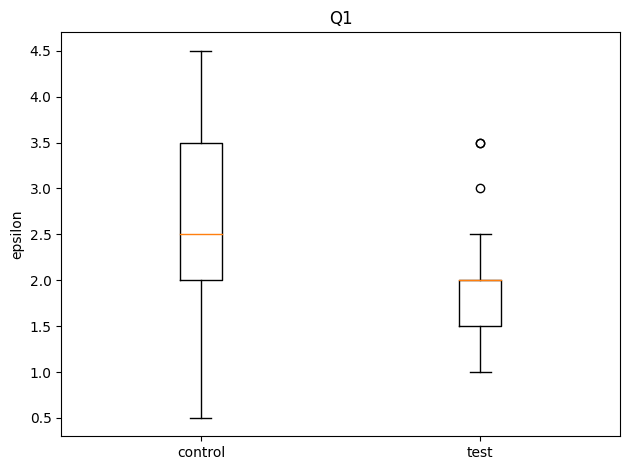

In [52]:
plot_boxplot(df["control1"], df["test1"], "Q1")

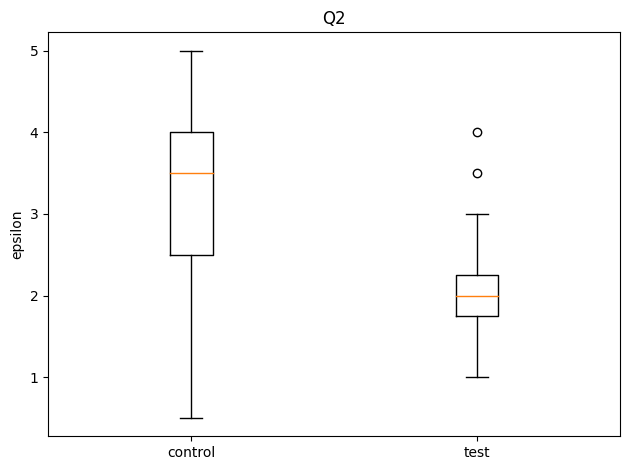

In [53]:
plot_boxplot(df["control2"], df["test2"], "Q2")

In [15]:
def plot_hist(control, test, name):

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(name)

    ax1.hist(control.dropna())
    ax2.hist(test.dropna())

    ax1.set_title("control")
    ax2.set_title("test")

    ax1.set_xticks(np.arange(0, 5.5, 0.5))
    ax2.set_xticks(np.arange(0, 5.5, 0.5))
    y_max = max(control.value_counts().max(), test.value_counts().max()) + 0.1
    ax1.set_ylim(0, y_max)
    ax2.set_ylim(0, y_max)


    ax1.set(xlabel='eps', ylabel='count')
    ax2.set(xlabel='eps', ylabel='count')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    ax1.label_outer()
    ax2.label_outer()

    fig.tight_layout()

    # plt.savefig(f"{name}_histgram")
    plt.show()
    plt.close()

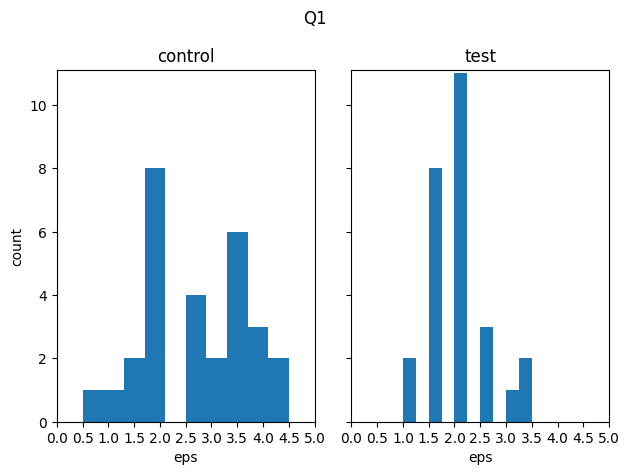

In [16]:
plot_hist(df["control1"], df["test1"], "Q1")

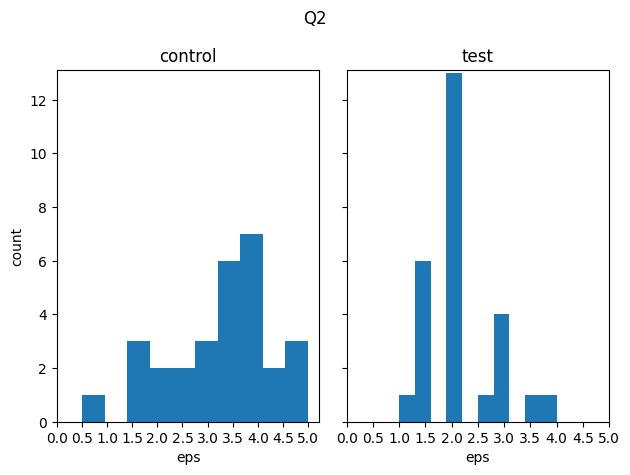

In [17]:
plot_hist(df["control2"], df["test2"], "Q2")

In [18]:
from scipy import stats

def tests(sample1, sample2):
    print(stats.mannwhitneyu(sample1.dropna(), sample2.dropna()))
    print(stats.kruskal(sample1.dropna(), sample2.dropna()))

In [19]:
tests(df.control1, df.test1)

MannwhitneyuResult(statistic=567.0, pvalue=0.003242008929831257)
KruskalResult(statistic=8.71559724058552, pvalue=0.0031549904357145004)


In [20]:
tests(df.control2, df.test2)

MannwhitneyuResult(statistic=622.5, pvalue=0.00012400701676339659)
KruskalResult(statistic=14.794729859739729, pvalue=0.00011987003039054332)


MannwhitneyuResult(statistic=126.0, pvalue=0.0819224045020055)
KruskalResult(statistic=3.1147000659195805, pvalue=0.07758876242614328)


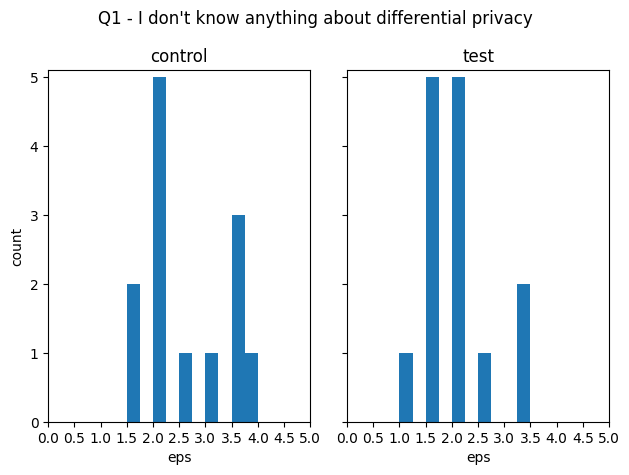

In [21]:
c1 = df[df.initial_q == "I don't know anything about differential privacy"]["control1"]
t1 = df[df.initial_q == "I don't know anything about differential privacy"]["test1"]

# display(c1)
# display(t1)

tests(c1, t1)

plot_hist(c1, t1, "Q1 - I don't know anything about differential privacy")

MannwhitneyuResult(statistic=153.5, pvalue=0.0022748984574572123)
KruskalResult(statistic=9.464173546302945, pvalue=0.0020952381113978065)


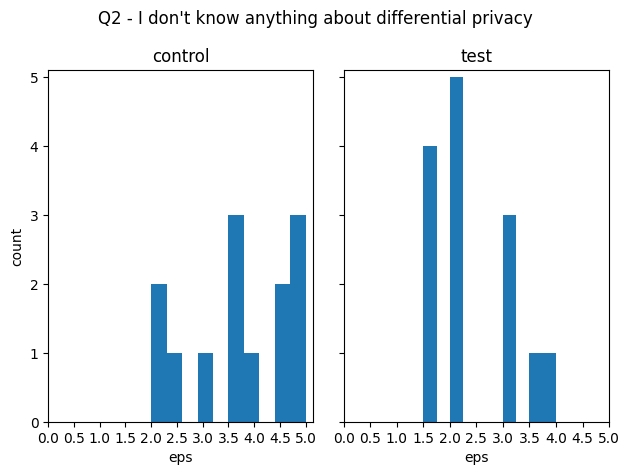

In [22]:
c2 = df[df.initial_q == "I don't know anything about differential privacy"]["control2"]
t2 = df[df.initial_q == "I don't know anything about differential privacy"]["test2"]

# display(c1)
# display(t1)

tests(c2, t2)

plot_hist(c2, t2, "Q2 - I don't know anything about differential privacy")

MannwhitneyuResult(statistic=158.0, pvalue=0.016787875008291497)
KruskalResult(statistic=5.825801118022199, pvalue=0.015792774392425834)


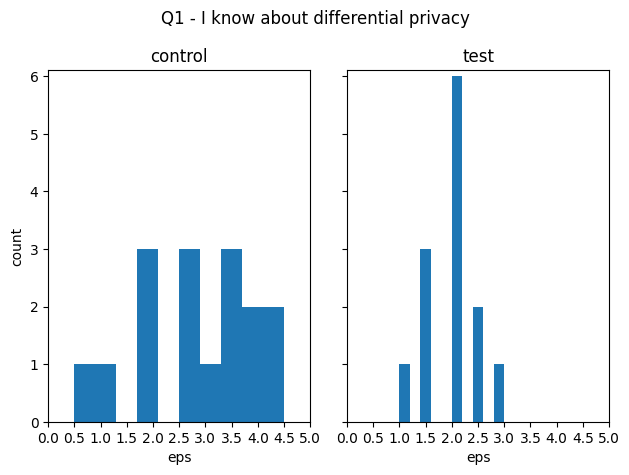

In [23]:
c1 = df[df.initial_q != "I don't know anything about differential privacy"]["control1"]
t1 = df[df.initial_q != "I don't know anything about differential privacy"]["test1"]

# display(c1)
# display(t1)

tests(c1, t1)

plot_hist(c1, t1, "Q1 - I know about differential privacy")

MannwhitneyuResult(statistic=159.5, pvalue=0.014005976699114023)
KruskalResult(statistic=6.147659568192547, pvalue=0.013158612489749323)


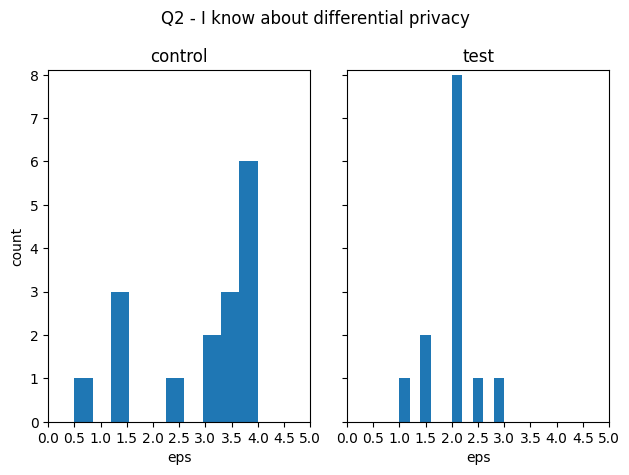

In [27]:
c2 = df[df.initial_q != "I don't know anything about differential privacy"]["control2"]
t2 = df[df.initial_q != "I don't know anything about differential privacy"]["test2"]

# display(c1)
# display(t1)

tests(c2, t2)

plot_hist(c2, t2, "Q2 - I know about differential privacy")

In [62]:
df_old = pd.read_csv("DP_study_result_nov_17.csv")
df_old.columns = ["control1", "control2", "test1", "test2", "q3", "q4", "duration", "test_follow_up", "initial_q"]
df_old

,control1,control2,test1,test2,q3,q4,duration,test_follow_up,initial_q
0,3.0,4.0,NaN,NaN,No preference,I prefer having both results,451,NaN,I don't know anything about differential privacy
1,NaN,NaN,2.0,1.5,I prefer knowing the prediction accuracy on bo...,I prefer having both results,762,Yes,I know about differential privacy but I've nev...
2,1.5,1.0,NaN,NaN,I prefer knowing the prediction accuracy on bo...,I prefer having both results,731,NaN,I know about differential privacy but I've nev...
3,2.0,4.0,NaN,NaN,I prefer knowing only the prediction accuracy ...,I prefer having both results,813,NaN,I don't know anything about differential privacy
4,2.0,4.0,NaN,NaN,I prefer knowing the prediction accuracy on bo...,I prefer having both results,866,NaN,I don't know anything about differential privacy
5,2.5,4.0,NaN,NaN,I prefer knowing the prediction accuracy on bo...,I prefer having only the result on the noisy data,402,NaN,I don't know anything about differential privacy
6,NaN,NaN,2.0,2.5,I prefer knowing the prediction accuracy on bo...,I prefer having only the result on the noisy data,608,Yes,I don't know anything about differential privacy
7,3.5,3.5,NaN,NaN,I prefer knowing the prediction accuracy on bo...,I prefer having only the result on the noisy data,972,NaN,I know about differential privacy but I've nev...
8,2.5,3.5,NaN,NaN,I prefer knowing the prediction accuracy on bo...,I prefer having both results,436,NaN,I don't know anything about differential privacy
9,2.5,2.0,NaN,NaN,I prefer knowing the prediction accuracy on bo...,I prefer having only the result on the noisy data,636,NaN,I don't know anything about differential privacy


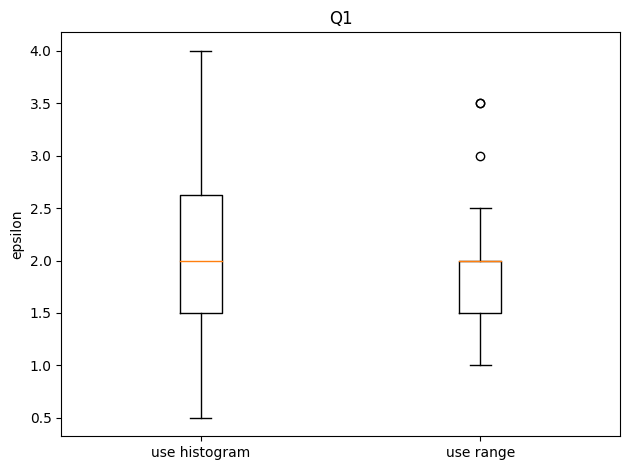

In [63]:
plot_boxplot(df_old["test1"], df["test1"], "Q1", labels=["use histogram", "use range"], savefig=False)

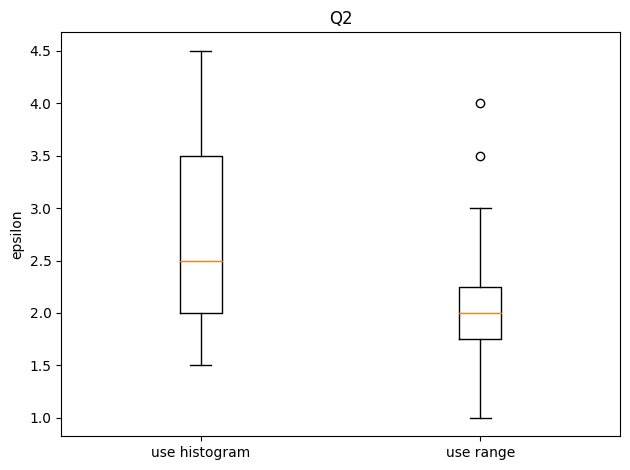

In [64]:
plot_boxplot(df_old["test2"], df["test2"], "Q2", labels=["use histogram", "use range"], savefig=False)

In [65]:
def plot_boxplot_3(sample1, sample2, sample3, name):

    print(name)

    plt.boxplot([sample1.dropna(), sample2.dropna(), sample3.dropna()])
    plt.xticks(ticks=[1, 2, 3], labels=["control", "use histogram", "use range"])
    plt.ylabel("epsilon")
    plt.title(name)

    plt.tight_layout()

    # plt.savefig(name)
    plt.show()
    plt.close()

Q1


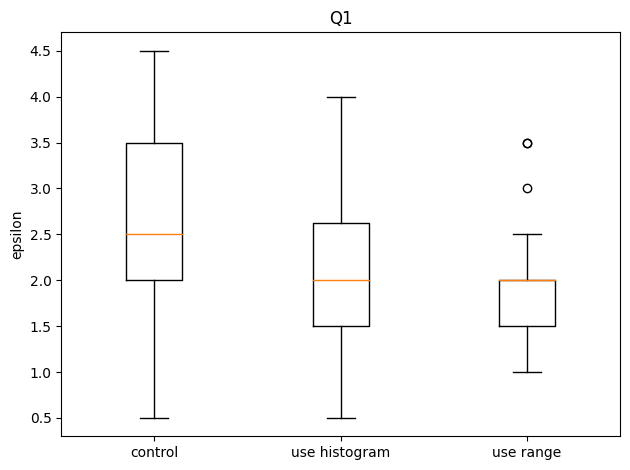

In [66]:
plot_boxplot_3(df["control1"], df_old["test1"], df["test1"], "Q1")

Q2


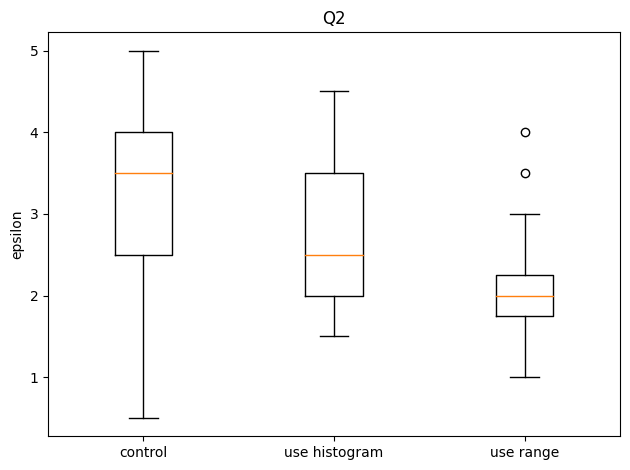

In [68]:
plot_boxplot_3(df["control2"], df_old["test2"], df["test2"], "Q2")

In [71]:
tests(df_old["test1"], df["test1"])

MannwhitneyuResult(statistic=299.5, pvalue=0.5144095396598504)
KruskalResult(statistic=0.4398716258235171, pvalue=0.50718442261099)


In [72]:
tests(df_old["test2"], df["test2"])

MannwhitneyuResult(statistic=402.0, pvalue=0.0034263690354698257)
KruskalResult(statistic=8.630524970101856, pvalue=0.003305762955413502)


In [78]:
df["control1"].var()

1.080665024630542

In [79]:
df_old["test1"].var()

0.7657894736842106

In [80]:
df["test1"].var()

0.3938746438746439

In [81]:
df["control2"].var()

1.3466748768472907

In [82]:
df_old["test2"].var()

0.7177631578947368

In [83]:
df["test2"].var()

0.47720797720797725

In [85]:
stats.kruskal(df["control1"].dropna(), df_old["test1"].dropna(), df["test1"].dropna())

KruskalResult(statistic=9.400179150144462, pvalue=0.009094462428080242)

In [86]:
stats.kruskal(df["control2"].dropna(), df_old["test2"].dropna(), df["test2"].dropna())

KruskalResult(statistic=17.795483484496838, pvalue=0.00013669727586762282)